# Licensed under the Apache License, Version 2.0 (the "License");

# Sequences, Time Series and Prediction
Week 2

For this exercise you’ll create your own synthetic dataset -- I’ve plotted a chart for what it should look like, see if you can figure out the parameters that get this series.

Once you have your series, you’ll create a DNN to predict values for that series!

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.7.0


Downloading...
From: https://drive.google.com/uc?id=1sDzcLKVZBQWeEYT101bEWCltlaFPjiIN
To: /content/C4_W2_Assignment_Image.png
100% 18.5k/18.5k [00:00<00:00, 19.1MB/s]
Expected:


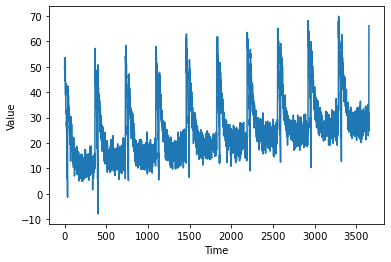

Your output:


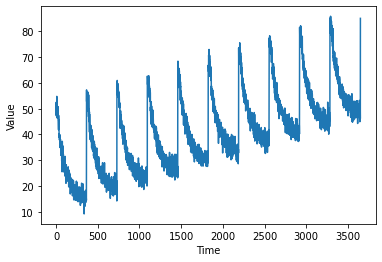

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 2 * np.pi), 1/np.exp(3*season_time)) # YOUR CODE HERE # * np.pi),
                    #YOUR CODE HERE# / np.exp(#YOUR CODE HERE# * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(10 * 365 + 1, dtype="float32")
baseline = 10 # YOUR CODE HERE #
series = trend(time, 0.1) # YOUR CODE HERE#)  
baseline = 10
amplitude = 40
slope = 0.01 # YOUR CODE HERE#
noise_level = 2 # YOUR CODE HERE#

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=51)

split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

# # # # # expected output
!gdown --id 1sDzcLKVZBQWeEYT101bEWCltlaFPjiIN
print("Expected:")
from IPython.display import display
from PIL import Image
path='./C4_W2_Assignment_Image.png'
display(Image.open(path))
# # # # #

### your output
print("Your output:")
plot_series(time, series)

In [ ]:
def windowed_dataset (series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window (window_size+1, shift = 1, drop_remainder=True)
  dataset = dataset.flat_map (lambda window: window.batch(window_size+1))
  dataset = dataset.shuffle(buffer_size=shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [ ]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=[window_size]), # YOUR CODE HERE #),
    tf.keras.layers.Dense(16, activation='relu'), # YOUR CODE HERE #, activation="relu"), 
    tf.keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer='adam') # YOUR CODE HERE #, optimizer=# YOUR CODE HERE#))
model.fit(dataset,epochs=100,verbose=0)

In [ ]:
forecast = []

for time in range(len(series)-window_size):
  forecast.append(model.predict(series[time:window_size+time][np.newaxis]))

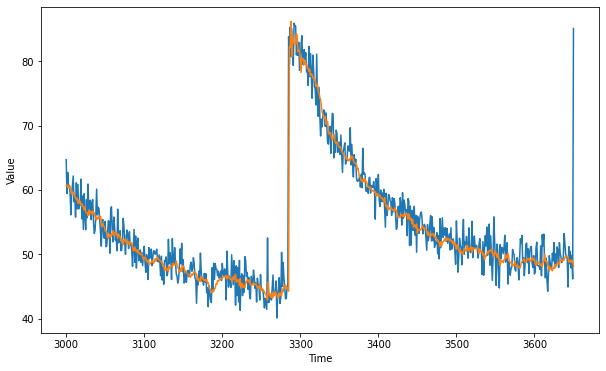

In [ ]:
forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

1.9788978

# Sequences, Time Series and Prediction
# Week 3

 In this exercise you’ll take a synthetic data set and write the code to pick the learning rate and then train on it to get an MAE of < 3

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.0


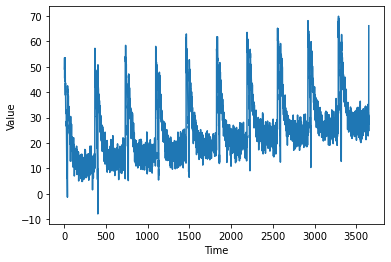

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 6 * np.pi),
                    2 / np.exp(9 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(10 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.005
noise_level = 3

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=51)

split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

plot_series(time, series)

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]), # YOUR CODE HERE),
  ### START CODE HERE  
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(32, activation ='relu'),
  tf.keras.layers.Dense(1),
  ### END CODE HERE
  tf.keras.layers.Lambda(lambda x: x*100) # YOUR CODE HERE)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
94/94 [==============================] - 10s 25ms/step - loss: 45.9621 - mae: 46.4621 - lr: 1.0000e-08
Epoch 2/100
94/94 [==============================] - 3s 24ms/step - loss: 33.7228 - mae: 34.2228 - lr: 1.1220e-08
Epoch 3/100
94/94 [==============================] - 3s 25ms/step - loss: 19.5892 - mae: 20.0891 - lr: 1.2589e-08
Epoch 4/100
94/94 [==============================] - 3s 24ms/step - loss: 15.1893 - mae: 15.6883 - lr: 1.4125e-08
Epoch 5/100
94/94 [==============================] - 3s 25ms/step - loss: 11.5090 - mae: 12.0065 - lr: 1.5849e-08
Epoch 6/100
94/94 [==============================] - 3s 26ms/step - loss: 8.3898 - mae: 8.8772 - lr: 1.7783e-08
Epoch 7/100
94/94 [==============================] - 3s 25ms/step - loss: 6.5504 - mae: 7.0257 - lr: 1.9953e-08
Epoch 8/100
94/94 [==============================] - 3s 25ms/step - loss: 5.8893 - mae: 6.3595 - lr: 2.2387e-08
Epoch 9/100
94/94 [==============================] - 2s 24ms/step - loss: 5.7148 - mae: 6.182

(1e-08, 0.0001, 0.0, 30.0)

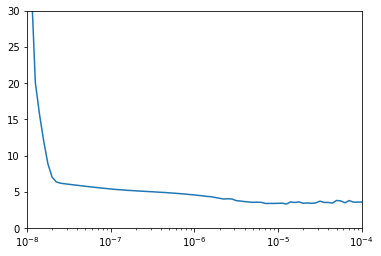

In [ ]:
plt.semilogx(history.history['lr'], history.history['mae'])
plt.axis([1e-8, 1e-4, 0, 30])

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]), # YOUR CODE HERE),
  ### START CODE HERE  
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(32, activation ='relu'),
  tf.keras.layers.Dense(1),
  ### END CODE HERE
  tf.keras.layers.Lambda(lambda x: x*100) # YOUR CODE HERE)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9), metrics=['mae']) # PUT YOUR LEARNING RATE HERE#, momentum=0.9),metrics=["mae"])
history = model.fit(dataset,epochs=500,verbose=1)
                                                            
# FIND A MODEL AND A LR THAT TRAINS TO AN MAE < 3   

Epoch 1/500
94/94 [==============================] - 12s 25ms/step - loss: 175.8742 - mae: 8.4291
Epoch 2/500
94/94 [==============================] - 3s 28ms/step - loss: 44.2279 - mae: 4.6397
Epoch 3/500
94/94 [==============================] - 2s 24ms/step - loss: 33.1151 - mae: 3.9018
Epoch 4/500
94/94 [==============================] - 3s 25ms/step - loss: 33.9861 - mae: 4.0621
Epoch 5/500
94/94 [==============================] - 3s 26ms/step - loss: 29.3175 - mae: 3.7211
Epoch 6/500
94/94 [==============================] - 3s 30ms/step - loss: 27.4438 - mae: 3.5626
Epoch 7/500
94/94 [==============================] - 3s 30ms/step - loss: 32.5013 - mae: 3.9802
Epoch 8/500
94/94 [==============================] - 2s 24ms/step - loss: 27.7118 - mae: 3.6322
Epoch 9/500
94/94 [==============================] - 2s 24ms/step - loss: 25.4649 - mae: 3.4441
Epoch 10/500
94/94 [==============================] - 3s 24ms/step - loss: 25.1741 - mae: 3.3906
Epoch 11/500
94/94 [=================

In [ ]:
forecast = []

for time in range(len(series)-window_size):
  predict = model.predict(series[time:time+window_size][np.newaxis])
  forecast.append(predict)



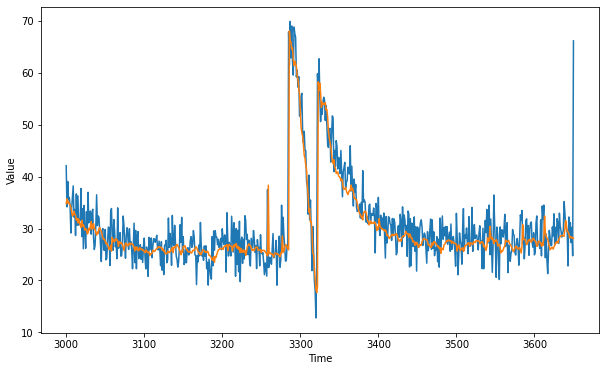

In [ ]:
results = forecast[split_time-window_size:]
results = np.array(results)[:,0,0]

plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

# YOUR RESULT HERE SHOULD BE LESS THAN 4

2.872109

# Sequences, Time Series and Prediction
# Week 4


This week you moved away from synthetic data to do a real-world prediction -- sunspots. You loaded data from CSV and built models to use it. For this week’s exercise, you’ll use a dataset from Jason Brownlee, author of the amazing MachineLearningMastery.com site and who has shared lots of datasets at https://github.com/jbrownlee/Datasets. It’s a dataset of daily minimum temperatures in the city of Melbourne, Australia measured from 1981 to 1990.  Your task is to download the dataset, parse the CSV, create a time series and build a prediction model from it. Your model should have an MAE of less than 2, and as you can see in the output, mine had 1.78. I’m sure you can beat that! :)

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [3]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv \
    -O /tmp/daily-min-temperatures.csv

--2022-02-17 12:13:49--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/plain]
Saving to: ‘/tmp/daily-min-temperatures.csv’

/tmp/daily-min-temp 100%[===================>]  66.33K  --.-KB/s    in 0.01s   

2022-02-17 12:13:49 (5.98 MB/s) - ‘/tmp/daily-min-temperatures.csv’ saved [67921/67921]



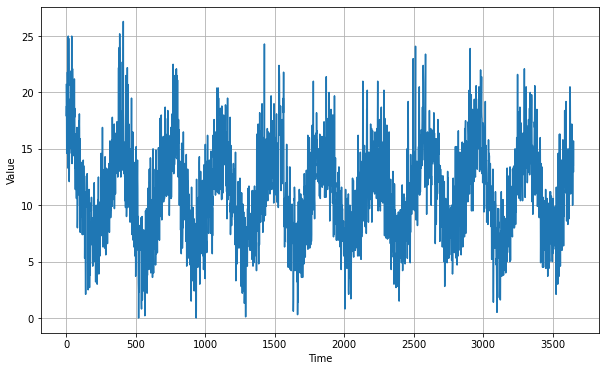

In [4]:
import csv
time_step = []
temps = []

with open('/tmp/daily-min-temperatures.csv') as csvfile:
# YOUR CODE HERE. READ TEMPERATURES INTO TEMPS
  reader = csv.reader(csvfile)
  next(reader)
  n = 0
  for line in reader:
    n = n + 1
    time_step.append(n)
    temps.append(float(line[1]))

# HAVE TIME STEPS BE A SIMPLE ARRAY OF 1, 2, 3, 4 etc

series = np.array(temps)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [5]:
split_time = 2500
time_train = time[:split_time] # YOUR CODE HERE
x_train = series [:split_time] # YOUR CODE HERE
time_valid = time[split_time:] # YOUR CODE HERE
x_valid = series [split_time:] # YOUR CODE HERE

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

In [6]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    # YOUR CODE HERE
    dataset = tf.expand_dims(series, axis = -1)
    dataset = tf.data.Dataset.from_tensor_slices (series)
    dataset = dataset.window (window_size+1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map (lambda window: window.batch(window_size+1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda x: (x[:-1], x[1:]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [7]:
def model_forecast(model, series, window_size):
    # YOUR CODE HERE
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size, shift = 1, drop_remainder = True)
    dataset = dataset.flat_map (lambda window: window.batch(window_size))
    dataset = dataset.batch(1).prefetch(1)
    forecast = model.predict(dataset)
    return forecast

In [8]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
# YOUR CODE HERE
  tf.keras.layers.Conv1D(64, 5, activation='relu', padding='causal', input_shape = [None, 1]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Dense (128, activation = 'relu'),
  tf.keras.layers.Dense (1),
  tf.keras.layers.Lambda (lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float64, name=None), TensorSpec(shape=(None, None), dtype=tf.float64, name=None))>
(2500,)
Epoch 1/100
10/10 [==============================] - 23s 120ms/step - loss: 61.3864 - mae: 61.8864 - lr: 1.0000e-08
Epoch 2/100
10/10 [==============================] - 1s 74ms/step - loss: 56.9451 - mae: 57.4451 - lr: 1.1220e-08
Epoch 3/100
10/10 [==============================] - 1s 77ms/step - loss: 50.0660 - mae: 50.5660 - lr: 1.2589e-08
Epoch 4/100
10/10 [==============================] - 1s 74ms/step - loss: 41.6240 - mae: 42.1240 - lr: 1.4125e-08
Epoch 5/100
10/10 [==============================] - 1s 73ms/step - loss: 32.4492 - mae: 32.9492 - lr: 1.5849e-08
Epoch 6/100
10/10 [==============================] - 1s 75ms/step - loss: 23.4860 - mae: 23.9859 - lr: 1.7783e-08
Epoch 7/100
10/10 [==============================] - 1s 75ms/step - loss: 15.1710 - mae: 15.6692 - lr: 1.9953e-08
Epoch 8/100
10/10 [===================

(1e-08, 0.0001, 0.0, 60.0)

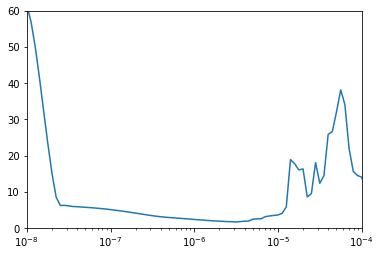

In [9]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [16]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
# YOUR CODE HERE
  tf.keras.layers.Conv1D(64, 5, activation='relu', padding='causal', input_shape = [None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(32, return_sequences=True),
  tf.keras.layers.Dense (128, activation = 'relu'),
  tf.keras.layers.Dense (1),
  tf.keras.layers.Lambda (lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(learning_rate=5e-6, momentum = 0.9) # YOUR CODE HERE, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100)# YOUR CODE HERE)
                                    
# EXPECTED OUTPUT SHOULD SEE AN MAE OF <2 WITHIN ABOUT 30 EPOCHS

Epoch 1/100
25/25 [==============================] - 5s 33ms/step - loss: 16.7428 - mae: 17.2374
Epoch 2/100
25/25 [==============================] - 1s 33ms/step - loss: 3.5714 - mae: 4.0451
Epoch 3/100
25/25 [==============================] - 1s 34ms/step - loss: 2.1441 - mae: 2.6013
Epoch 4/100
25/25 [==============================] - 1s 33ms/step - loss: 1.8956 - mae: 2.3483
Epoch 5/100
25/25 [==============================] - 1s 33ms/step - loss: 1.8086 - mae: 2.2601
Epoch 6/100
25/25 [==============================] - 1s 33ms/step - loss: 1.7569 - mae: 2.2079
Epoch 7/100
25/25 [==============================] - 1s 33ms/step - loss: 1.7265 - mae: 2.1768
Epoch 8/100
25/25 [==============================] - 1s 33ms/step - loss: 1.6926 - mae: 2.1425
Epoch 9/100
25/25 [==============================] - 1s 34ms/step - loss: 1.6725 - mae: 2.1218
Epoch 10/100
25/25 [==============================] - 1s 33ms/step - loss: 1.6526 - mae: 2.1018
Epoch 11/100
25/25 [===========================

In [17]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

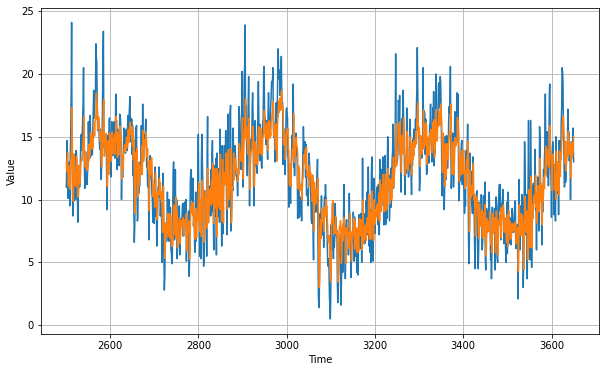

In [18]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

# EXPECTED OUTPUT. PLOT SHOULD SHOW PROJECTIONS FOLLOWING ORIGINAL DATA CLOSELY

In [19]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

# EXPECTED OUTPUT MAE < 2 -- I GOT 1.789626

1.8101662

In [20]:
print(rnn_forecast)
# EXPECTED OUTPUT -- ARRAY OF VALUES IN THE LOW TEENS

[12.967539 12.259958 13.096378 ... 13.572719 13.85428  15.015713]
